In [1]:
import sys

In [2]:
sys.path.insert(0,'/KIMEL/tigrlab/scratch/jjeyachandra/BOONStim/profiling_output/make_fig/lib/python3.6/site-packages/')

In [3]:
import seaborn as sns
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
hist_loc = '/KIMEL/tigrlab/scratch/jjeyachandra/BOONStim/profiling_output/'

In [5]:
folds = np.arange(0,10)

In [6]:
#LOAD A SINGLE RESULT
fold_0_file = os.path.join(hist_loc,'0','hist')
fold_0 = np.genfromtxt(fold_0_file)

In [7]:
fold_list = []
loc_list = []
rot_list = []
for k in folds:
    fold_list.append(-np.genfromtxt(os.path.join(hist_loc,str(k),'hist')))
    loc_list.append(np.genfromtxt(os.path.join(hist_loc,str(k),'loc')))
    rot_list.append(np.genfromtxt(os.path.join(hist_loc,str(k),'rot')))

In [8]:
histarr = np.array(fold_list)
df = pd.DataFrame(histarr).T
df.reset_index(inplace=True)

In [9]:
melt_df = df.melt(id_vars='index',value_vars=np.arange(0,10))
melt_df.columns = ['iter','run','f(x)']

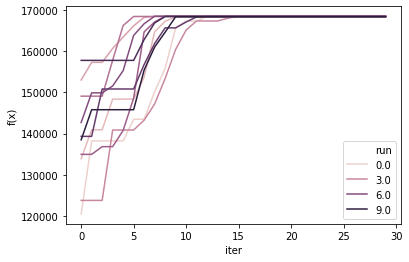

In [10]:
ax = sns.lineplot(x='iter',y='f(x)',data=melt_df,hue='run')

In [22]:
loc_df = pd.DataFrame(np.array(loc_list)).reset_index()
loc_df.columns=['run','x','y','z']
melt_loc = loc_df.melt(id_vars='run',value_vars=['x','y','z'],var_name='coordinate')

In [44]:
rot_df = pd.DataFrame(np.array(rot_list)).reset_index()
rot_df.columns = ['run','x','y','z']
melt_rot =rot_df.melt(id_vars='run',value_vars=['x','y','z'],var_name='rotation')
melt_rot.head()

,run,rotation,value
0,0,x,0.514668
1,1,x,0.479684
2,2,x,0.511578
3,3,x,0.524176
4,4,x,0.554265


In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
rot_arr

array([[ 0.51466846, -0.37819013,  0.76947294],
       [ 0.47968406, -0.41946388,  0.77068363],
       [ 0.51157802, -0.38195447,  0.76967442],
       [ 0.52417597, -0.36645747,  0.76873173],
       [ 0.55426457, -0.32772488,  0.765106  ],
       [ 0.5338905 , -0.35422541,  0.76777946],
       [ 0.53072392, -0.35824029,  0.76811198],
       [ 0.55992678, -0.32014555,  0.76419162],
       [ 0.55655644, -0.32466865,  0.76474518],
       [ 0.56628517, -0.31151742,  0.76307143]])

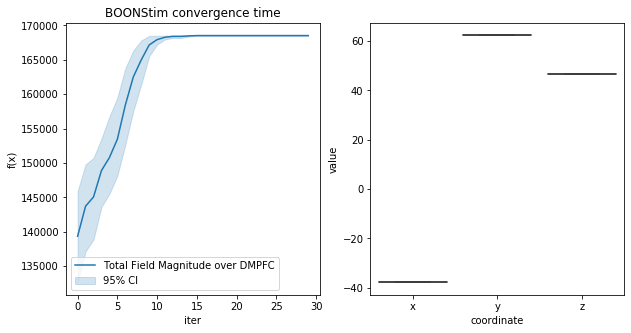

In [29]:
#Objective function
fig = plt.figure(figsize=(10,5))
ax1= plt.subplot(121)
sns.lineplot(x='iter',y='f(x)',data=melt_df,ax=ax1)
ax1.legend(['Total Field Magnitude over DMPFC','95% CI'])
ax1.set_title('BOONStim convergence time')

#Location fix
ax2 = plt.subplot(122)
sns.boxplot(x='coordinate',y='value',data=melt_loc)

Text(0.5, 0.92, 'Rotation vector distribution')

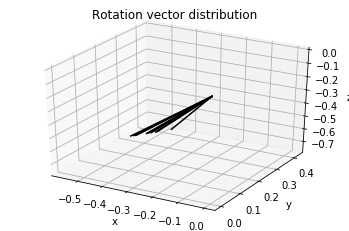

In [56]:
ax3 = plt.subplot(111,projection='3d')
for r in rot_arr:
    x = [0,-r[0]]
    y = [0,-r[1]]
    z = [0,-r[2]]
    ax3.plot(x,y,z,'k-')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('Rotation vector distribution')

In [ ]:
plt.hist()

In [57]:
g.set_ylabels()

In [64]:
g.axes[0][0]

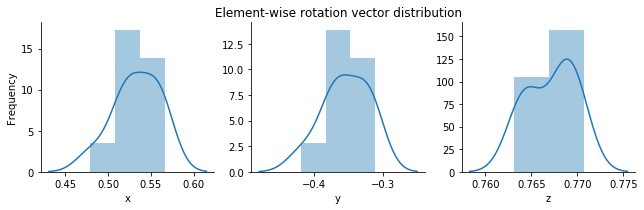

In [67]:
#Rotation
g = sns.FacetGrid(melt_rot,col="rotation",sharey=False,sharex=False)
g.map(sns.distplot,"value")
g.set_ylabels('Frequency')
g.axes[0][0].set_xlabel('x')
g.axes[0][1].set_xlabel('y')
g.axes[0][2].set_xlabel('z')
g.set_titles('')
g.axes[0][1].set_title('Element-wise rotation vector distribution')
plt.show()

In [32]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
